In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn

In [2]:
df = pd.read_csv("Desktop\PGP-DSE Data\Machine Learning\Credit Card Fraud Detection Dataset\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

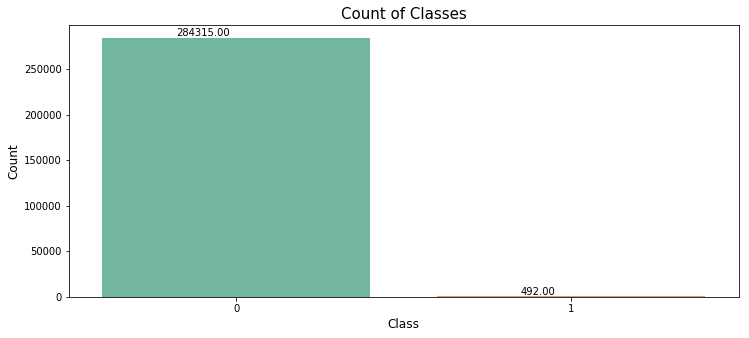

In [4]:
plt.figure(figsize=(12,5))
graph = sns.countplot(x=df['Class'],palette="Set2")
plt.title("Count of Classes",fontsize=15)
plt.xlabel("Class",fontsize=12)
plt.ylabel("Count",fontsize=12)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

In [5]:
print("0 --> Normal Transactions:",len(df[df['Class']==0]))
print("1 --> Fraud Transactions:",len(df[df['Class']==1]))

0 --> Normal Transactions: 284315
1 --> Fraud Transactions: 492


In [6]:
# As we can see that this dataset is super-highly imbalanced.
# We need to look into the techniques to overcome the issue of Imbalanced Dataset. Some of the techniques are:-
# Random Under-Sampling
# Random Over-Sampling
# SMOTE
# We will try and implement these techniques and see which works better.

# As we can see and also mentioned in the description of the dataset that these values have been fetched with the help of
# PCA, which requires scaling of the features in order to have all the features having values on same scale for projecting
# on to the principal axis. So, we need not to scale these values any further, however, we still would like to see the shape
# of each of these 'V' features (V1-V28).

# As this is a super-highly imbalanced dataset, we would not be able to use accuracy_scores as they tend to mislead in the
# case of imbalanced dataset, because, if we are to take a base model which predicts only one value (i.e. of the majority
# class), even then we will get a very good accuracy score, for example in our case the base model will give an accuracy of
# approximately 99.8%, which is highly misleading as this will not at all be able to detect the frauds.

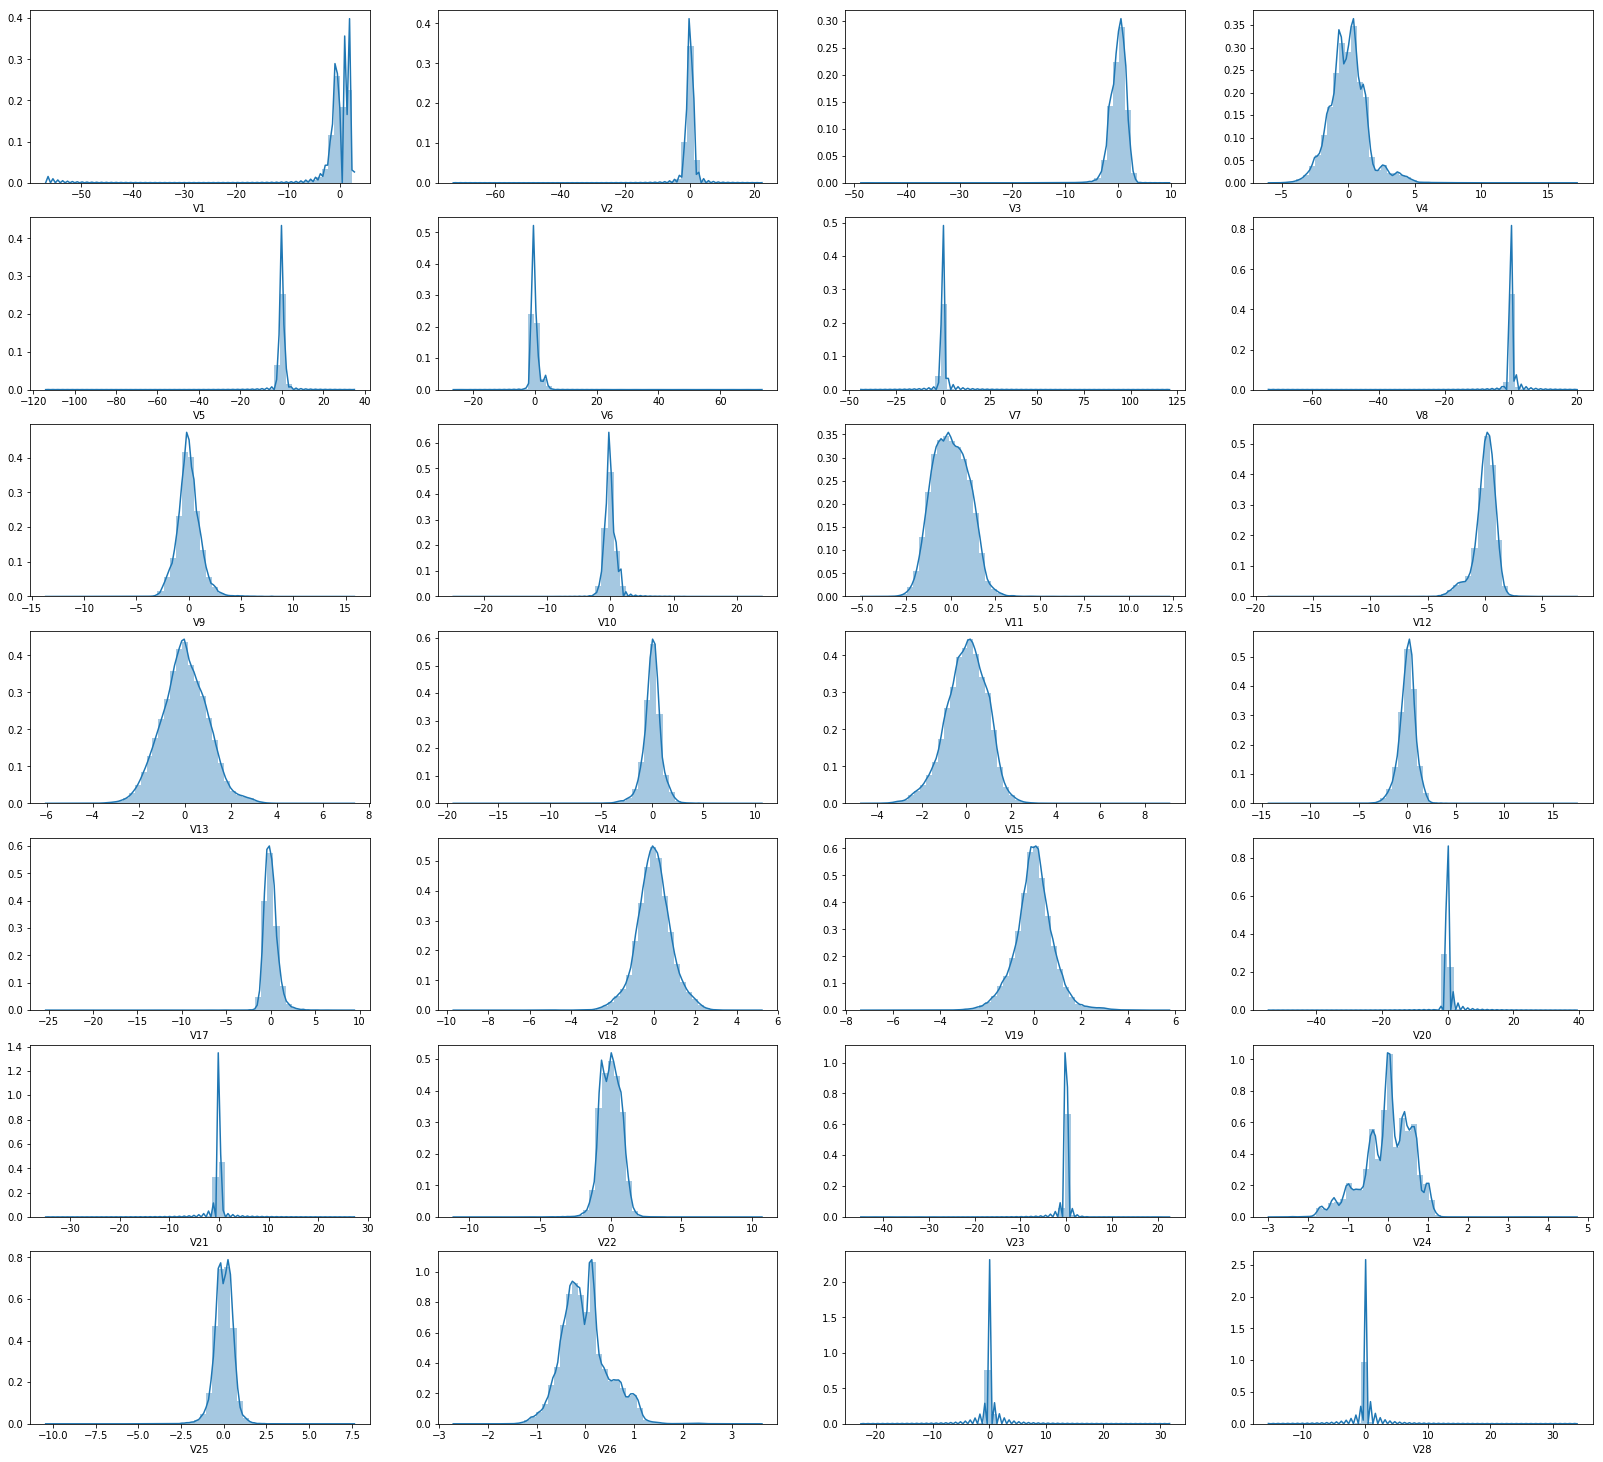

In [7]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(7, 4, figsize=(28,26))

sns.distplot(df['V1'],ax=axes[0,0])
sns.distplot(df['V2'],ax=axes[0,1])
sns.distplot(df['V3'],ax=axes[0,2])
sns.distplot(df['V4'],ax=axes[0,3])
sns.distplot(df['V5'],ax=axes[1,0])
sns.distplot(df['V6'],ax=axes[1,1])
sns.distplot(df['V7'],ax=axes[1,2])
sns.distplot(df['V8'],ax=axes[1,3])
sns.distplot(df['V9'],ax=axes[2,0])
sns.distplot(df['V10'],ax=axes[2,1])
sns.distplot(df['V11'],ax=axes[2,2])
sns.distplot(df['V12'],ax=axes[2,3])
sns.distplot(df['V13'],ax=axes[3,0])
sns.distplot(df['V14'],ax=axes[3,1])
sns.distplot(df['V15'],ax=axes[3,2])
sns.distplot(df['V16'],ax=axes[3,3])
sns.distplot(df['V17'],ax=axes[4,0])
sns.distplot(df['V18'],ax=axes[4,1])
sns.distplot(df['V19'],ax=axes[4,2])
sns.distplot(df['V20'],ax=axes[4,3])
sns.distplot(df['V21'],ax=axes[5,0])
sns.distplot(df['V22'],ax=axes[5,1])
sns.distplot(df['V23'],ax=axes[5,2])
sns.distplot(df['V24'],ax=axes[5,3])
sns.distplot(df['V25'],ax=axes[6,0])
sns.distplot(df['V26'],ax=axes[6,1])
sns.distplot(df['V27'],ax=axes[6,2])
sns.distplot(df['V28'],ax=axes[6,3])

# Splitting Feature & Target Variables

In [8]:
x = df.drop(columns=['Class'],axis=1).copy()
y = df['Class']

# Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.30, random_state=10)

# Importing Necessary Libraries

In [10]:
from collections import Counter
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score,fbeta_score
from sklearn.metrics import precision_score,recall_score,precision_recall_curve
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Implementing Base Model - Logistic Regression

In [11]:
model_log = LogisticRegression()
grid = {'C':10.0**np.arange(-2,3),'penalty':['l1','l2']}
cv = KFold(n_splits=5,shuffle=False,random_state=None)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.30, random_state=10)
clf = GridSearchCV(model_log,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_macro', verbose=0)

In [13]:
prediction = clf.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[85286    16]
 [   50    91]]
0.9992275552122467
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85302
          1       0.85      0.65      0.73       141

avg / total       1.00      1.00      1.00     85443



# Implementing Base Model - Random Forest Classifier

Using class_weight for increasing the importance of each of the observation under Fraudulent Transaction

In [14]:
class_weight = dict({0:1,1:100})

In [15]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(class_weight=class_weight)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 100},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [16]:
prediction = classifier.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[85299     3]
 [   31   110]]
0.999602073897218
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85302
          1       0.97      0.78      0.87       141

avg / total       1.00      1.00      1.00     85443



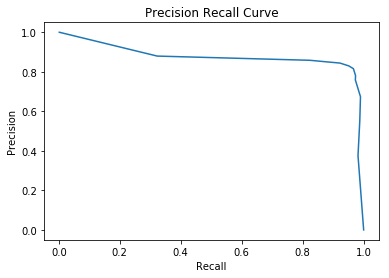

In [17]:
from sklearn.metrics import precision_recall_curve
y_probs = classifier.predict_proba(X_test)[:,1]
precision,recall,thresholds = precision_recall_curve(y_test,y_probs)

# Plot ROC Curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

# ------------------------------------------------------------------------------------------------------------

Without Using the class_weight in RandomForestClassifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
prediction = classifier.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[85297     5]
 [   27   114]]
0.9996254813150287
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85302
          1       0.96      0.81      0.88       141

avg / total       1.00      1.00      1.00     85443



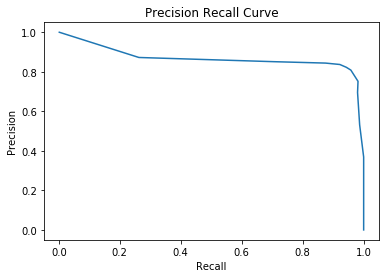

In [20]:
from sklearn.metrics import precision_recall_curve
y_probs = classifier.predict_proba(X_test)[:,1]
precision,recall,thresholds = precision_recall_curve(y_test,y_probs)

# Plot ROC Curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

In [21]:
# As we can see that, by using class_weight, we are actually not improving the results rather we are deteriorating it or 
# not affecting it much. So this might be useful in those datasets where we have more number of records in 0 or 1.

# Implementing UnderSampling Using NearMiss

In [22]:
from imblearn.under_sampling import NearMiss

In [23]:
nm = NearMiss(0.75)
x_nm,y_nm = nm.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_nm)))

The number of classes before fit Counter({0: 199013, 1: 351})
The number of classes after fit Counter({0: 468, 1: 351})


In [24]:
model = RandomForestClassifier()
model.fit(x_nm,y_nm)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
prediction = model.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[76863  8439]
 [   13   128]]
0.901080252331964
             precision    recall  f1-score   support

          0       1.00      0.90      0.95     85302
          1       0.01      0.91      0.03       141

avg / total       1.00      0.90      0.95     85443



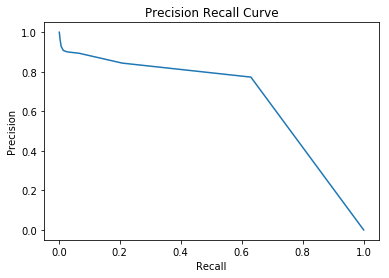

In [26]:
from sklearn.metrics import precision_recall_curve
y_probs = model.predict_proba(X_test)[:,1]
precision,recall,thresholds = precision_recall_curve(y_test,y_probs)

# Plot PR Curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

# Implementing OverSampling Using RandomOverSampler

In [27]:
from imblearn.over_sampling import RandomOverSampler

In [28]:
ros = RandomOverSampler(0.75,random_state=8)
x_ros,y_ros = ros.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_ros)))

The number of classes before fit Counter({0: 199013, 1: 351})
The number of classes after fit Counter({0: 199013, 1: 149259})


# ------------------------------------------------------------------------------------------------------------

Random Forest Classifier

In [29]:
model = RandomForestClassifier()
model.fit(x_ros,y_ros)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
prediction = model.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[85296     6]
 [   30   111]]
0.9995786664794073
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85302
          1       0.95      0.79      0.86       141

avg / total       1.00      1.00      1.00     85443



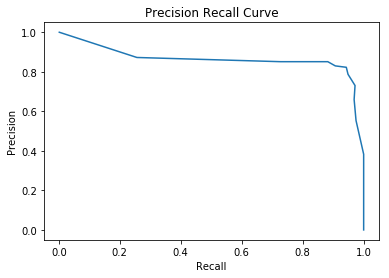

0.9358


In [31]:
from sklearn.metrics import precision_recall_curve
y_probs = model.predict_proba(X_test)[:,1]
precision,recall,thresholds = precision_recall_curve(y_test,y_probs)

# Plot PR Curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,y_probs)
print("{:.4f}".format(auc))

# ------------------------------------------------------------------------------------------------------------

K Neighbors Classifier

In [32]:
model = KNeighborsClassifier()
model.fit(x_ros,y_ros)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [33]:
prediction = model.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[85146   156]
 [  115    26]]
0.9968282948866496
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85302
          1       0.14      0.18      0.16       141

avg / total       1.00      1.00      1.00     85443



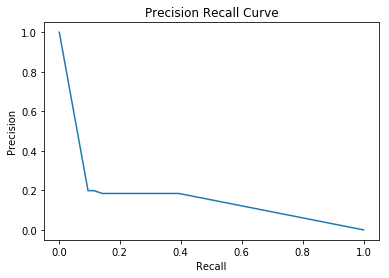

In [34]:
from sklearn.metrics import precision_recall_curve
y_probs = model.predict_proba(X_test)[:,1]
precision,recall,thresholds = precision_recall_curve(y_test,y_probs)

# Plot PR Curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

# ------------------------------------------------------------------------------------------------------------

Support Vector Classifier

In [ ]:
model = SVC(kernel='rbf',C=0.8,gamma=0.6)
model.fit(x_ros,y_ros)

In [ ]:
prediction = model.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

In [ ]:
from sklearn.metrics import precision_recall_curve
y_probs = model.predict_proba(X_test)[:,1]
precision,recall,thresholds = precision_recall_curve(y_test,y_probs)

# Plot PR Curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

# ------------------------------------------------------------------------------------------------------------

AdaBoost Classifier

In [35]:
model = AdaBoostClassifier()
model.fit(x_ros,y_ros)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [36]:
prediction = model.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[84334   968]
 [   15   126]]
0.9884952541460389
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     85302
          1       0.12      0.89      0.20       141

avg / total       1.00      0.99      0.99     85443



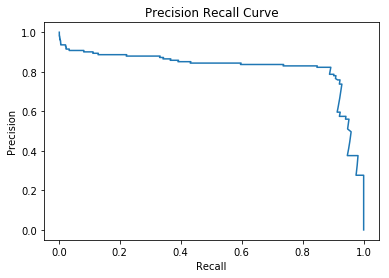

In [37]:
from sklearn.metrics import precision_recall_curve
y_probs = model.predict_proba(X_test)[:,1]
precision,recall,thresholds = precision_recall_curve(y_test,y_probs)

# Plot PR Curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

# ------------------------------------------------------------------------------------------------------------

Gradient Boosting Classifier

In [38]:
model = GradientBoostingClassifier()
model.fit(x_ros,y_ros)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [39]:
prediction = model.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[84819   483]
 [   14   127]]
0.99418325667404
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85302
          1       0.21      0.90      0.34       141

avg / total       1.00      0.99      1.00     85443



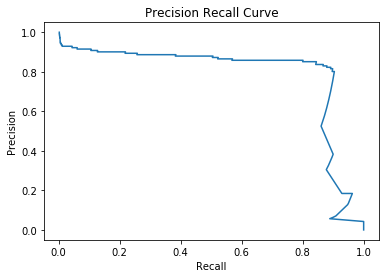

In [40]:
from sklearn.metrics import precision_recall_curve
y_probs = model.predict_proba(X_test)[:,1]
precision,recall,thresholds = precision_recall_curve(y_test,y_probs)

# Plot PR Curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

# Implementing OverSampling Using SMOTE

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
sm = SMOTE(0.70,random_state=15)
x_sm,y_sm = sm.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_sm)))

The number of classes before fit Counter({0: 199013, 1: 351})
The number of classes after fit Counter({0: 199013, 1: 139309})


# ------------------------------------------------------------------------------------------------------------

Random Forest Classifier

In [43]:
model = RandomForestClassifier()
model.fit(x_sm,y_sm)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
prediction = model.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[85287    15]
 [   21   120]]
0.9995786664794073
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85302
          1       0.89      0.85      0.87       141

avg / total       1.00      1.00      1.00     85443



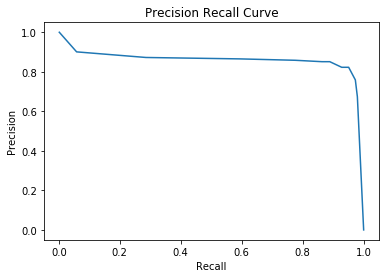

0.9487


In [45]:
from sklearn.metrics import precision_recall_curve
y_probs = model.predict_proba(X_test)[:,1]
precision,recall,thresholds = precision_recall_curve(y_test,y_probs)

# Plot PR Curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,y_probs)
print("{:.4f}".format(auc))

# ------------------------------------------------------------------------------------------------------------

K Neighbors Classifier

In [46]:
model = KNeighborsClassifier()
model.fit(x_sm,y_sm)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [47]:
prediction = model.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[81400  3902]
 [   73    68]]
0.9534777571012254
             precision    recall  f1-score   support

          0       1.00      0.95      0.98     85302
          1       0.02      0.48      0.03       141

avg / total       1.00      0.95      0.97     85443



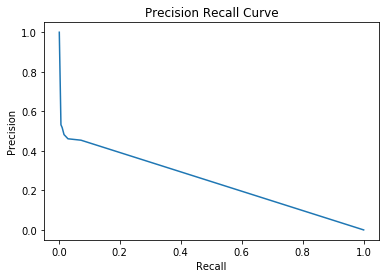

In [48]:
from sklearn.metrics import precision_recall_curve
y_probs = model.predict_proba(X_test)[:,1]
precision,recall,thresholds = precision_recall_curve(y_test,y_probs)

# Plot PR Curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

# ------------------------------------------------------------------------------------------------------------

AdaBoost Classifier

In [49]:
model = AdaBoostClassifier()
model.fit(x_sm,y_sm)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [50]:
prediction = model.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[84576   726]
 [   17   124]]
0.9913041442833234
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85302
          1       0.15      0.88      0.25       141

avg / total       1.00      0.99      0.99     85443



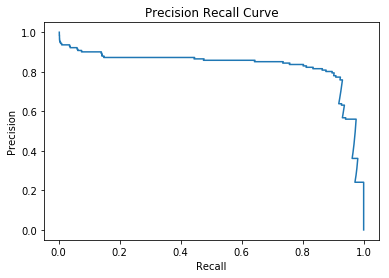

In [51]:
from sklearn.metrics import precision_recall_curve
y_probs = model.predict_proba(X_test)[:,1]
precision,recall,thresholds = precision_recall_curve(y_test,y_probs)

# Plot PR Curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

# ------------------------------------------------------------------------------------------------------------

Gradient Boost Classifier

In [52]:
model = GradientBoostingClassifier()
model.fit(x_sm,y_sm)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [53]:
prediction = model.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[84906   396]
 [   16   125]]
0.995178071930995
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85302
          1       0.24      0.89      0.38       141

avg / total       1.00      1.00      1.00     85443



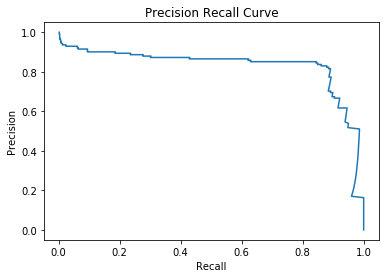

In [54]:
from sklearn.metrics import precision_recall_curve
y_probs = model.predict_proba(X_test)[:,1]
precision,recall,thresholds = precision_recall_curve(y_test,y_probs)

# Plot PR Curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

# Implementing OverSampling Using SMOTETomek

In [55]:
from imblearn.combine import SMOTETomek

In [56]:
smtk = SMOTETomek(0.75,random_state=42)
x_smtk,y_smtk = smtk.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_smtk)))

The number of classes before fit Counter({0: 199013, 1: 351})
The number of classes after fit Counter({0: 198314, 1: 148560})


# ------------------------------------------------------------------------------------------------------------

Random Forest Classifier

In [57]:
model = RandomForestClassifier()
model.fit(x_smtk,y_smtk)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [58]:
prediction = model.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[85288    14]
 [   23   118]]
0.9995669627705019
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85302
          1       0.89      0.84      0.86       141

avg / total       1.00      1.00      1.00     85443



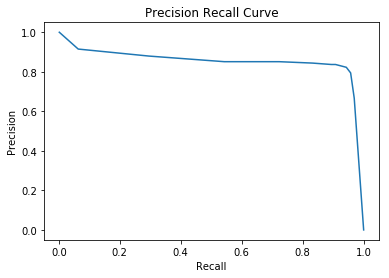

0.9560


In [59]:
from sklearn.metrics import precision_recall_curve
y_probs = model.predict_proba(X_test)[:,1]
precision,recall,thresholds = precision_recall_curve(y_test,y_probs)

# Plot PR Curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,y_probs)
print("{:.4f}".format(auc))

# ------------------------------------------------------------------------------------------------------------

K Neighbors Classifier

In [60]:
model = KNeighborsClassifier()
model.fit(x_smtk,y_smtk)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [61]:
prediction = model.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[81265  4037]
 [   73    68]]
0.9518977563990029
             precision    recall  f1-score   support

          0       1.00      0.95      0.98     85302
          1       0.02      0.48      0.03       141

avg / total       1.00      0.95      0.97     85443



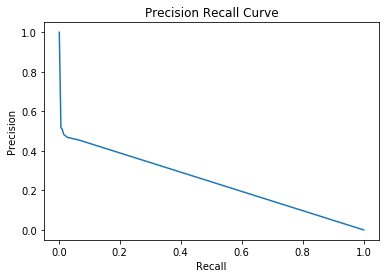

In [62]:
from sklearn.metrics import precision_recall_curve
y_probs = model.predict_proba(X_test)[:,1]
precision,recall,thresholds = precision_recall_curve(y_test,y_probs)

# Plot PR Curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

# ------------------------------------------------------------------------------------------------------------

Support Vector Classifier

In [63]:
# model = SVC(kernel='rbf',C=0.8,gamma=0.6)
# model.fit(X_smtk,y_smtk)

In [64]:
# prediction = model.predict(X_test)
# print(confusion_matrix(y_test,prediction))
# print(accuracy_score(y_test,prediction))
# print(classification_report(y_test,prediction))

In [65]:
# from sklearn.metrics import precision_recall_curve
# y_probs = model.predict_proba(X_test)[:,1]
# precision,recall,thresholds = precision_recall_curve(y_test,y_probs)

# # Plot PR Curve
# plt.plot(precision, recall)
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision Recall Curve')
# plt.show()

# ------------------------------------------------------------------------------------------------------------

AdaBoost Classifier

In [66]:
model = AdaBoostClassifier()
model.fit(x_smtk,y_smtk)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [67]:
prediction = model.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[84569   733]
 [   14   127]]
0.991257329447702
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85302
          1       0.15      0.90      0.25       141

avg / total       1.00      0.99      0.99     85443



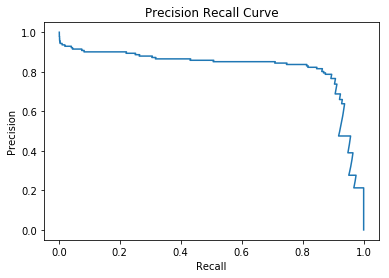

0.9601


In [68]:
from sklearn.metrics import precision_recall_curve
y_probs = model.predict_proba(X_test)[:,1]
precision,recall,thresholds = precision_recall_curve(y_test,y_probs)

# Plot PR Curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,y_probs)
print("{:.4f}".format(auc))

# ------------------------------------------------------------------------------------------------------------

Gradient Boosting Classifier

In [69]:
model = GradientBoostingClassifier()
model.fit(x_smtk,y_smtk)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [70]:
prediction = model.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[84882   420]
 [   15   126]]
0.9949088866261718
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85302
          1       0.23      0.89      0.37       141

avg / total       1.00      0.99      1.00     85443



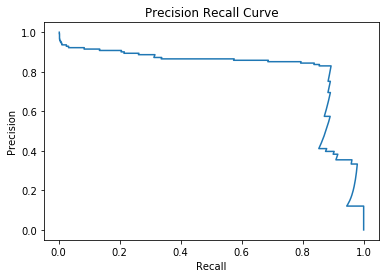

In [71]:
from sklearn.metrics import precision_recall_curve
y_probs = model.predict_proba(X_test)[:,1]
precision,recall,thresholds = precision_recall_curve(y_test,y_probs)

# Plot PR Curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

In [72]:
# If we compare all the models, then it turns out that the model with Random Forest and SMOTE is the best in predicting
# the results, it has the highest Precision and Recall with highest AUC for Precision-Recall Curve.
# With the help of this model we will be able to identify 84% of the fraud transactions successfully, which was our initial
# problem statement, that we need to be able to identify very few Fraudulent transactions from a very huge list of Non-
# Fraudulent Transactions.

In [73]:
# Other models are also giving good AUC-Score for PR-Curve, but their Precision-Score or Recall-Score are very less and they
# are making many mistakes as a model.
# In our case we should be having less False Positives and selected model is giving us the least number of mistakes. We can
# also perform Hyperparameter Tuning using RandomizedSearchCV to get better results.